## Exploring Music21

In [1]:
from music21 import *

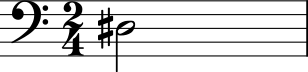

In [11]:
n = note.Note('D#3')
n.duration.type = 'half'
n.show()

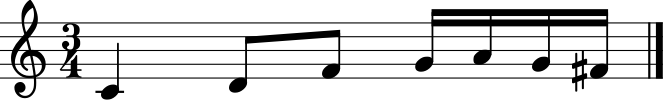

In [3]:
littleMelody = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
littleMelody.show()

In [4]:
littleMelody.show('midi')

In [6]:
import random
# prettymidi package

**ABC Notation**:

Used more for folk and traditional music. Represents music as ABD | DGE | etc


**Midi (Musical Instrument Digital Interface) Format**:

**Note On** signals that a key has been pressed or a note on another instrument (like a MIDI guitar or clarinet) has been played. The Note On message includes instructions for what key was pressed and at what velocity (how hard the note was played).
**Note Off** signals that the key has been released or the note is done playing.
**Polyphonic Key Pressure** is a measurement of how hard a key is pressed once it "bottoms out." On some keyboards, this adds vibrato or other effects to the note.
**Control Change** indicates that a controller -- perhaps a foot pedal or a fader knob -- has been pressed or turned. The control change message includes the number assigned to the controller and the value of the change (0-127).
**Pitch Wheel Change** signals that the pitch of the note has been bent with the keyboard's pitch wheel.

## Reading in a Midi File

Parsing MIDI Files
MIDI input and output is handled in the same was other formats. Simply call the music21.converter.parse() function on the desired file path or URL.

Remember (or learn if you haven’t yet), that MIDI has no information about enharmonic spelling (C# and Db are the same), and that detecting the lengths of notes can be difficult. Music21 does very well with MIDI files that were created in notation software or sequencing software, but has a harder time handling MIDI files created by recording live input. For those files, we suggest converting the MIDI files in software such as Finale that has a more sophisticated MIDI to MusicXML conversion routine.

In [2]:
score = converter.parse('data/chpn_op66_format0.midi', format = 'midi')

In [8]:
part_stream = score.parts.stream()
for part in part_stream:
    print(part.partName)

None


In [9]:
score.parts

<music21.stream.iterator.StreamIterator for Score:0xa18401d10 @:0>

Now have a stream object, but the subobject is Score

In [10]:
partStream = score.parts.stream()
partStream.classes

('Score', 'Stream', 'StreamCoreMixin', 'Music21Object', 'object')

In [11]:
score.measures(2,5)

<music21.stream.Score 0xa18aca450>

In [12]:
score.flat.notes

<music21.stream.iterator.StreamIterator for Score:0xa18401d10_flat @:0>

In [29]:
#Look at the first few notes
[str(p) for p in score.parts[0].pitches[0:10]]

['G#2', 'G#3', 'C#2', 'C#3', 'C#4', 'E4', 'G#3', 'C#3', 'C#4', 'E4']

In [34]:
#Looking at a few of the octaves
[p.octave for p in score.parts[0].pitches[0:10]]

[2, 3, 2, 3, 4, 4, 3, 3, 4, 4]

In [13]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

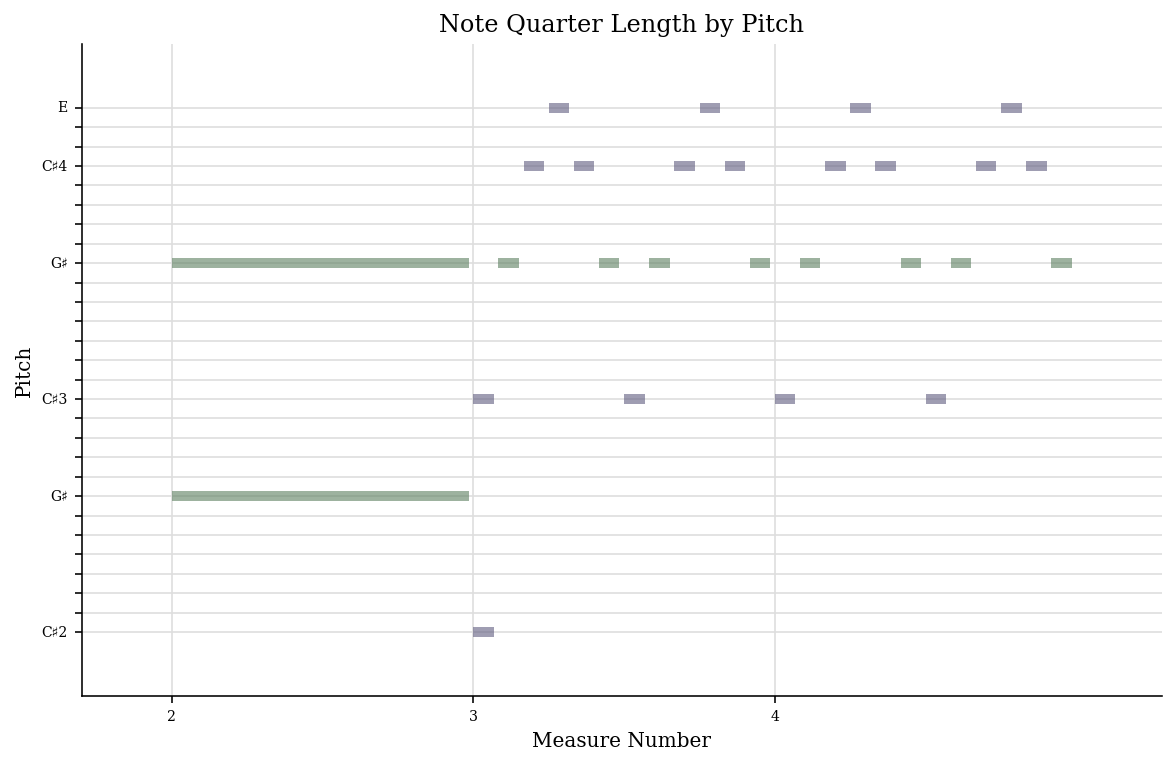

In [16]:
score.measures(2,4).plot('pianoroll')

In [19]:
for nt in score.measures(2,4).flat.notes:
    if isinstance(nt, note.Note):
        print(nt.pitch.ps)

56.0
61.0
64.0
61.0
56.0
49.0
56.0
61.0
64.0
61.0
56.0
49.0
56.0
61.0
64.0
61.0
56.0
49.0
56.0
61.0
64.0
61.0
56.0


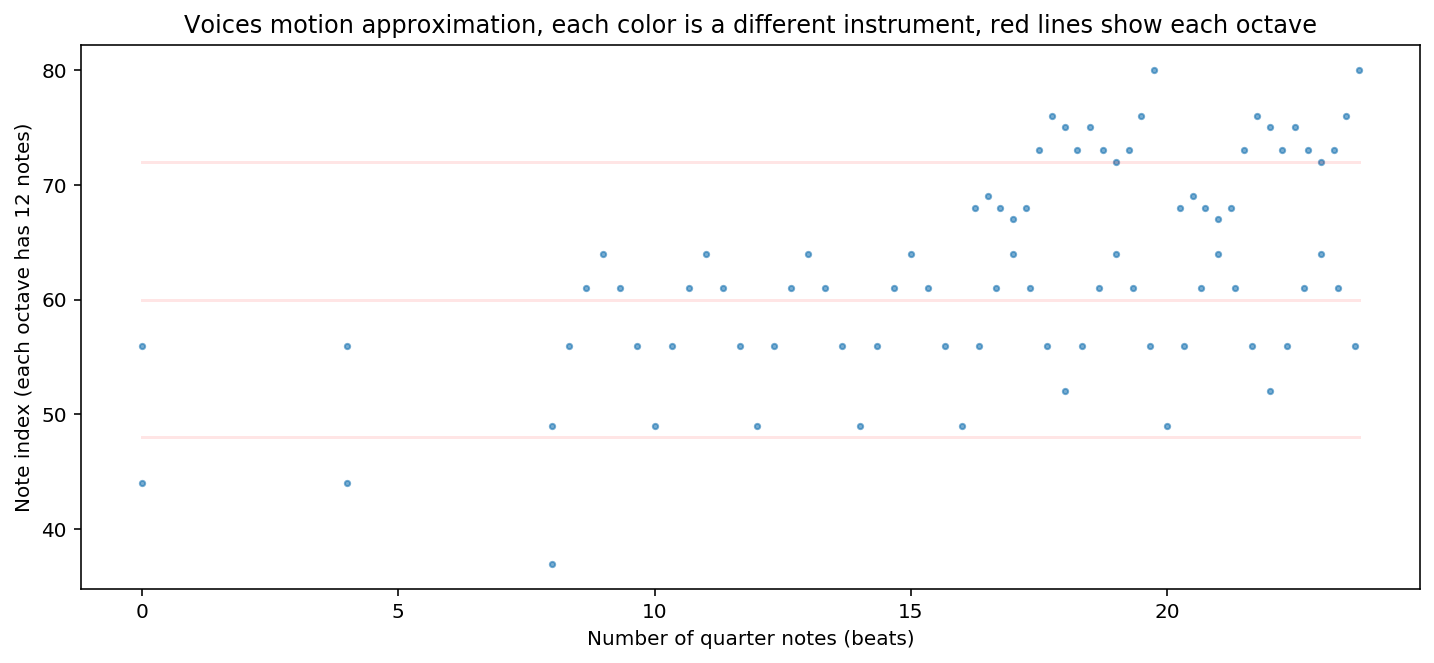

In [14]:
def extract_notes(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part.flat.notes: 
        # Get each note in the midi score format flattened (meaning collapse all parts together in the score)
        if isinstance(nt, note.Note):
            # Returns whether the item is an instance of class "note"
            ret.append(max(0.0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0.0, pitch.ps))
                parent_element.append(nt)
    
    return ret, parent_element

def print_parts_countour(midi):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1)
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0
    
    # Drawing notes.
    for i in range(len(midi.parts)):
        top = midi.parts[i].flat.notes                  
        y, parent_element = extract_notes(top)
        if (len(y) < 1): continue
            
        x = [n.offset for n in parent_element]
        ax.scatter(x, y, alpha=0.6, s=7)
        
        aux = min(y)
        if (aux < minPitch): minPitch = aux
            
        aux = max(y)
        if (aux > maxPitch): maxPitch = aux
            
        aux = max(x)
        if (aux > xMax): xMax = aux
    
    for i in range(1, 10):
        linePitch = pitch.Pitch('C{0}'.format(i)).ps
        if (linePitch > minPitch and linePitch < maxPitch):
            ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))            

    plt.ylabel("Note index (each octave has 12 notes)")
    plt.xlabel("Number of quarter notes (beats)")
    plt.title('Voices motion approximation, each color is a different instrument, red lines show each octave')
    plt.show()

# Focusing only on 6 first measures to make it easier to understand.
print_parts_countour(score.measures(0, 6))

**Pitch** refers to the frequency of sound (A,B,C,etc)
**Octave** refers to which set of pitches
**Offset** refers to where the note is located in the piece
**Chord Objects** - container for set of notes played at same time

## Libraries to Manipulate Midi Files:

- pretty_midi
    start time, end time, pitch, velocity
    Below is example. Midi Number refers to pitch
- music21
- mido

![pic](pics/midi_img.gif)

**Control Changes in Midi Files**:
0 Bank Select (MSB)
1 Modulation Wheel
2 Breath controller
3 Undefined
4 Foot Pedal (MSB)
5 Portamento Time (MSB)
6 Data Entry (MSB) - cc100=0 & cc101=0 is pitch bend range
7 Volume (MSB)
8 Balance (MSB)
9 Undefined
10 Pan position (MSB)
11 Expression (MSB)
12 Effect Control 1 (MSB)
13 Effect Control 2 (MSB)
14 Undefined
15 Undefined
16 Ribbon Controller or General Purpose Slider 1
17 Knob 1 or General Purpose Slider 2
18 General Purpose Slider 3
19 Knob 2 General Purpose Slider 4
20 Knob 3 or Undefined
21 Knob 4 or Undefined
22-31 undefined
32 Bank Select (LSB) 
33 Modulation Wheel (LSB)
34 Breath controller (LSB)
35 Undefined
36 Foot Pedal (LSB)
37 Portamento Time (LSB)
38 Data Entry (LSB)
39 Volume (LSB)
40 Balance (LSB)
41 Undefined
42 Pan position (LSB)
43 Expression (LSB)
44 Effect Control 1 (LSB) 
45 Effect Control 2 (LSB)
46-63 Undefined.
64 Hold/Sustain Pedal (on/off) 
65 Portamento (on/off)
66 Sustenuto Pedal (on/off)
67 Soft Pedal (on/off)
68 Legato Pedal (on/off)
69 Hold 2 Pedal (on/off)
70 Sound Variation
71 Resonance (Timbre)
72 Sound Release Time
73 Sound Attack Time
74 Frequency Cutoff 
75 Sound Control 6
76 Sound Control 7
77 Sound Control 8
78 Sound Control 9
79 Sound Control 10
80 Decay or General Purpose Button 1 (on/off) 
81 Hi Pass Filter Frequency or General Purpose Button 2 (on/off) 
82 General Purpose Button 3 (on/off) 
83 General Purpose Button 4 (on/off)
84-90 Undefined
91 Reverb Level
92 Tremolo Level
93 Chorus Level
94 Celeste Level or Detune
95 Phaser Level
96 Data Button increment
97 Data Button decrement
98 Non-registered Parameter (LSB)
99 Non-registered Parameter (MSB)
100 Registered Parameter (LSB)
101 Registered Parameter (MSB)
102-119 Undefined
120 All Sound Off
121 All Controllers Off
122 Local Keyboard (on/off)
123 All Notes Off
124 Omni Mode Off
125 Omni Mode On
126 Mono Operation
127 Poly Operation